In [1]:
import pandas as pd
import nltk
import spacy
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [3]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

In [8]:
# Load the dataset, specifying the encoding
df = pd.read_csv('News Categoires.csv', encoding='latin-1')

In [9]:
df

,News,Category
0,The IMF now expects China's economy to grow by...,Economy
1,Manufacturing activity in the Eurozone has dec...,Economy
2,Continued disruptions in the global supply cha...,Economy
3,Concerns about food security remain high due t...,Economy
4,"While some central banks, like the US Federal ...",Economy
...,...,...
247,The war in Ukraine continues with no end in si...,Politics
248,Chinese President Xi Jinping secured a third t...,Politics
249,The 28th Conference of the Parties to the Unit...,Politics
250,The global economy is facing a number of chall...,Politics


In [10]:
df['News'][0]

"The IMF now expects China's economy to grow by 5.4% this year,\xa0higher than previous estimates.\xa0This reflects China's shift away from its zero-Covid policy and increased government stimulus."

In [11]:
def nltk_pos_tag(text):
    tokens = nltk.word_tokenize(text)
    return nltk.pos_tag(tokens)

# Function to perform spaCy POS tagging
def spacy_pos_tag(text):
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

# Function to count POS tags
def count_pos_tags(tagged_tokens):
    return Counter(tag for _, tag in tagged_tokens)

In [12]:
# Analyze the entire dataset
nltk_results = []
spacy_results = []

for text in df['News']:
    nltk_tagged = nltk_pos_tag(text)
    spacy_tagged = spacy_pos_tag(text)

    nltk_results.append(count_pos_tags(nltk_tagged))
    spacy_results.append(count_pos_tags(spacy_tagged))

In [13]:
# Combine results
nltk_total = sum(nltk_results, Counter())
spacy_total = sum(spacy_results, Counter())

In [14]:
# Print results
print("NLTK POS Tag Counts:")
for tag, count in nltk_total.most_common():
    print(f"{tag}: {count}")

NLTK POS Tag Counts:
NN: 1602
IN: 1184
NNP: 1122
DT: 963
JJ: 872
NNS: 842
.: 477
,: 440
VBG: 355
CC: 342
VBZ: 285
VB: 271
TO: 245
VBN: 239
VBP: 190
VBD: 163
RB: 146
CD: 133
POS: 102
PRP$: 95
WDT: 75
MD: 73
PRP: 61
JJR: 29
NNPS: 26
RBR: 23
WP: 22
``: 21
'': 21
JJS: 18
(: 17
): 17
RP: 16
WRB: 8
EX: 5
:: 5
RBS: 3
$: 2
PDT: 2
FW: 2
UH: 1


In [15]:
print("\nspaCy POS Tag Counts:")
for tag, count in spacy_total.most_common():
    print(f"{tag}: {count}")


spaCy POS Tag Counts:
NOUN: 2523
VERB: 1208
ADP: 1161
PROPN: 1133
PUNCT: 1083
DET: 930
ADJ: 846
AUX: 454
CCONJ: 346
PRON: 298
PART: 272
ADV: 192
SPACE: 180
NUM: 140
SCONJ: 132
SYM: 5
X: 2
INTJ: 1


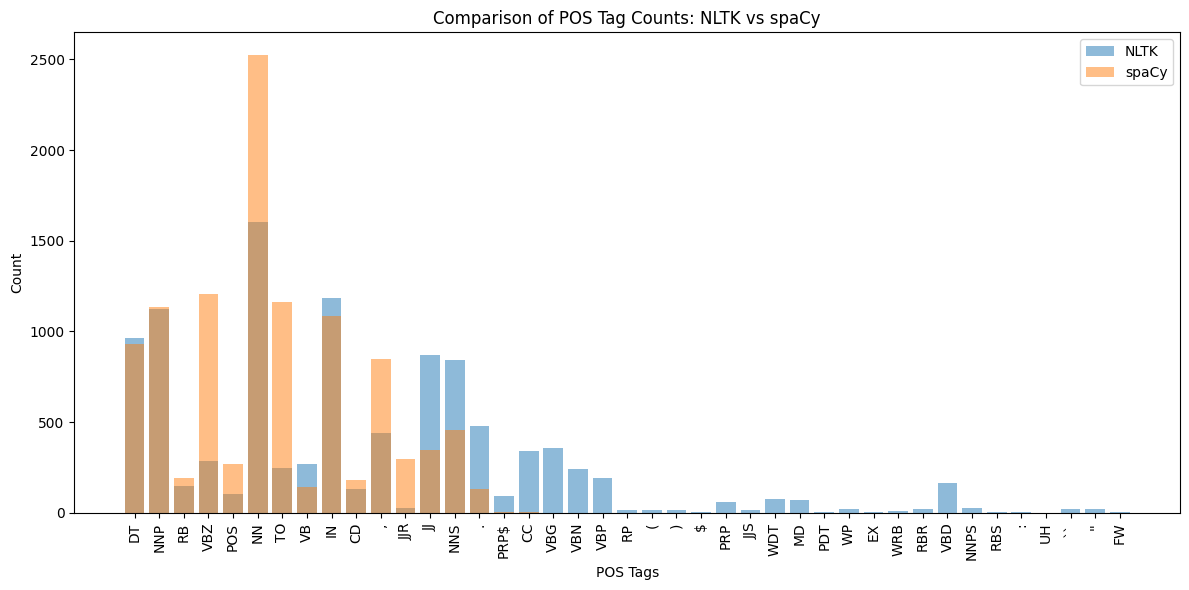

In [16]:
# Visualize comparison
plt.figure(figsize=(12, 6))
plt.bar(range(len(nltk_total)), list(nltk_total.values()), align='center', alpha=0.5, label='NLTK')
plt.bar(range(len(spacy_total)), list(spacy_total.values()), align='center', alpha=0.5, label='spaCy')
plt.xticks(range(len(nltk_total)), list(nltk_total.keys()), rotation=90)
plt.xlabel('POS Tags')
plt.ylabel('Count')
plt.title('Comparison of POS Tag Counts: NLTK vs spaCy')
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
# Calculate percentage difference
total_nltk = sum(nltk_total.values())
total_spacy = sum(spacy_total.values())

print("\nPercentage Difference in POS Tag Counts:")
for tag in set(nltk_total.keys()) | set(spacy_total.keys()):
    nltk_count = nltk_total.get(tag, 0)
    spacy_count = spacy_total.get(tag, 0)
    nltk_percent = (nltk_count / total_nltk) * 100
    spacy_percent = (spacy_count / total_spacy) * 100
    diff = abs(nltk_percent - spacy_percent)
    print(f"{tag}: {diff:.2f}%")


Percentage Difference in POS Tag Counts:
NUM: 1.28%
WP: 0.21%
WRB: 0.08%
:: 0.05%
): 0.16%
'': 0.20%
FW: 0.02%
NNPS: 0.25%
PART: 2.49%
PDT: 0.02%
VBD: 1.55%
CD: 1.26%
JJ: 8.29%
RBR: 0.22%
JJS: 0.17%
IN: 11.26%
,: 4.18%
ADP: 10.65%
UH: 0.01%
VBN: 2.27%
VBZ: 2.71%
DT: 9.16%
NNP: 10.67%
NOUN: 23.13%
WDT: 0.71%
VBP: 1.81%
RBS: 0.03%
DET: 8.53%
X: 0.02%
CC: 3.25%
PRP: 0.58%
.: 4.54%
NN: 15.24%
VB: 2.58%
ADJ: 7.76%
$: 0.02%
JJR: 0.28%
SCONJ: 1.21%
POS: 0.97%
INTJ: 0.01%
PROPN: 10.39%
PUNCT: 9.93%
AUX: 4.16%
SPACE: 1.65%
TO: 2.33%
SYM: 0.05%
PRON: 2.73%
VERB: 11.08%
CCONJ: 3.17%
(: 0.16%
NNS: 8.01%
VBG: 3.38%
RP: 0.15%
EX: 0.05%
RB: 1.39%
ADV: 1.76%
MD: 0.69%
``: 0.20%
PRP$: 0.90%
